#### Subgradient method

Subgradient method to minimize nondifferentiable convex function $f$

$$x^{k+1}=x^k-\alpha_k g^k, \,\, \alpha_k>0$$

* $g^k$ is `any` subgradient of $f$ at $x^k$
* it is `not` a descent method, we keep track of best point
$$f_{\text{best}}^k=\min_{i=1,\cdots, k}f(x^i)$$

Step size are fixed ahead of time, rather than using some sort of line search as in gradient methods

* $\alpha_k$ can be constant
* step length can be constant $\alpha_k=\gamma/\|g^k\|_2$, so $\|x^{k+1}-x^k\|_2=\gamma$
* `square summable but not summable`
$$\sum_{k=1}^{\infty}\alpha_k^2<\infty,\,\sum_{k=1}^{\infty}\alpha_k=\infty$$
* `nonsummable diminishing` (e.g., $\alpha_k=c/k$, etc.)
$$\lim_{k\rightarrow \infty}\alpha_k=0,\,\sum_{k=1}^{\infty}\alpha_k=\infty$$

#### Convergence analysis

To obtain bounds of

$$f_{\text{best}}^k-f(x^*)$$

for various choices of step size, where $x^*$ solves unconstrained optimization problem $\min f(x), f(x^*)=f^*$

Assumption on $f$

* convex, not necessarily smooth, not necessarily strongly convex
* subgradient `uniformly bounded`
$$\forall x, \forall g\in \partial f(x), \|g\|_2 \leq G, G>0$$
* $\|x^1-x^*\|_2\leq R$

For subgradient steps

$$x^{k+1}=x^k-\alpha_k g^k, \, g^k\in \partial f(x^k)$$

we start by writing the gap between $x^k$ and $x^*$

$$\begin{align*}
\|x^{k+1}-x^*\|_2^2 &= \|x^k-\alpha_k g^k-x^*\|_2^2 \\
& = \|x^k-x^*\|_2^2 -2\alpha_k \langle g^k, x^k-x^*\rangle +\alpha_k^2\|g^k\|_2^2 \\
& \left(f^*\geq f(x^k) + \langle g^k , x^*-x^k \rangle \Longrightarrow -\langle g^k , x^k-x^* \rangle \leq f^*-f(x^k)\right) \\
& \leq \|x^k-x^*\|_2^2 -2\alpha_k \left(f(x^k)-f^*\right) +\alpha_k^2\|g^k\|_2^2 \\
& \text{this shows when step size is small enough, we are making progress...} \\
& \text{apply the inequality recursively} \\
&\leq \|x^1-x^*\|_2^2-2\sum_{i=1}^k\alpha_i\left(f(x^i)-f^*\right)+\sum_{i=1}^k\alpha_i^2\|g^i\|_2^2 \\
& \text{rearrange using }\|x^{k+1}-x^*\|_2^2\geq 0,\, \|x^1-x^*\|_2\leq R \\
2\sum_{i=1}^k\alpha_i\left(f(x^i)-f^*\right) &\leq R^2+\sum_{i=1}^k\alpha_i^2\|g^i\|_2^2 \\
& \text{since }\sum_{i=1}^k\alpha_i\left(f(x^i)-f^*\right)\geq\left(\sum_{i=1}^k \alpha_i\right)(f_{\text{best}}^k-f^*)\\
f_{\text{best}}^k-f^* &\leq \left(R^2+\sum_{i=1}^k\alpha_i^2\|g^i\|_2^2\right)/\left(2\sum_{i=1}^k \alpha_i\right)\\
& \text{use }\|g^k\|_2 \leq G \\
&\leq \boxed{\left(R^2+G^2\sum_{i=1}^k\alpha_i^2\right)/\left(2\sum_{i=1}^k \alpha_i\right)}
\end{align*}$$

With this, we have the following

* constant step size $\alpha_k=\alpha$: converges to $G^2\alpha/2$
* constant step length $\alpha_k=\gamma/\|g^k\|_2$: converges to $G\gamma /2$
* square summable but not summable: converges to zero
* nonsummable diminishing: converges to zero

##### Bounded subgradient and Lipschitz continuous function

$\|g\|_2\leq G, G>0, \forall x,\forall g\in \partial f(x)$ implies $f$ is Lipschitz continuous with constant $G$

$$|f(x)-f(y)|\leq G\|x-y\|_2, \forall x, y$$

To see this, let $g_x\in \partial f(x), g_y\in \partial f(y)$, we have

$$g_x^T(x-y)\geq f(x)-f(y)\geq g_y^T(x-y)$$

with Cauchy-Schwarz ($\pm a^Tb\leq \|a\|_2\|b\|_2$), we have

$$G\|x-y\|_2\geq f(x)-f(y)\geq -G\|x-y\|_2$$

##### Optimal sequence

We can choose sequence of positive $\alpha_1, \cdots, \alpha_k$ such that

$$\left(R^2+G^2\sum_{i=1}^k\alpha_i^2\right)/\left(2\sum_{i=1}^k \alpha_i\right)$$

is minimized

First, note that it is a convex function itself (quadratic over linear), and we can permute $\alpha_i$ and the function value does not change

Then, we apply all possible permutation to one optimal sequence $\alpha^*$, and use Jensen's inequality

$$f(\mathbb{E}[\alpha])\leq \mathbb{E}[f(\alpha)]$$

the right hand size would be just $f^*$ (since permutation does not change function value), while $\mathbb{E}[\alpha]$ (over all possible permutation) would be a sequence with identical $\alpha_i$ and $f(\mathbb{E}[\alpha])$ must also be $f^*$

Therefore, we can see that all $\alpha_i$ must be equal in the optimal sequence

We can then write the bound as

$$\frac{R^2+G^2k\alpha^2}{2k\alpha}$$

Take derivative and set it to zero, we get

$$\alpha=(R/G)/\sqrt{k}$$

Plug it back, we have

$$f_{\text{best}}^k-f^*\leq RG/\sqrt{k}$$

#### A stopping criterion

Previously, we have

$$2\sum_{i=1}^k\alpha_i\left(f(x^i)-f^*\right) \leq R^2+\sum_{i=1}^k\alpha_i^2\|g^i\|_2^2$$

Rearrange and we have a lower bound

$$f^*\geq l^k=\left(2\sum_{i=1}^k\alpha_if(x^i)-R^2-\sum_{i=1}^k\alpha_i^2\|g^i\|_2^2\right)/\left(2\sum_{i=1}^k\alpha_i\right)$$

and we can terminate when $f_{\text{best}}^k-l_{\text{best}}^k$ is smaller than some threshold

However, due to being slow in going to zero and the difficulty to justify $R$ value, subgradient method is often used without any formal stopping criterion

#### Piecewise linear minimization example

$$\min f(x)=\max_{i=1,\cdots, m}(a_i^Tx+b_i)$$

To find a subgradient, we first find index $j$ such that

$$a_j^T+b_j=\max_{i=1, \cdots, m}(a_i^Tx+b_i)$$

Then, we take $g=a_j$ and run subgradient steps

$$x^{k+1}=x^k-\alpha_ka_j$$

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cp
import time
np.set_printoptions(formatter={'float': '{: 0.4f}'.format})

plt.style.use('dark_background')
# color: https://matplotlib.org/stable/gallery/color/named_colors.htm

##### Constant step length

In [24]:
def subgrad_pwl_const_step_len(A, b, x1, R, gamma, tol, n_iter):
    # piecewise linear minimization with constant step length

    f = [np.inf]
    f_best = [np.inf]
    l_best = [-np.inf]
    sum_alpha = 0
    sum_alpha_f = 0
    sum_alpha_subgrad = 0
    x = x1.copy()

    for _ in range(n_iter):
        f_vals = A @ x + b
        f_val = np.max(f_vals)
        idx_max = np.argmax(f_vals)
        subgrad = A[idx_max, :]

        # Step size
        alpha = gamma / np.linalg.norm(subgrad)

        f.append(f_val)
        f_best.append(min(f_val, f_best[-1]))

        # Lower bound
        sum_alpha += alpha
        sum_alpha_f += alpha * f_val
        sum_alpha_subgrad += alpha**2 * np.linalg.norm(subgrad)**2

        low_b = (2 * sum_alpha_f - R**2 - sum_alpha_subgrad) / (2 * sum_alpha)
        l_best.append(max(low_b, l_best[-1]))

        if f_best[-1] - l_best[-1] < tol:
            break

        # Subgradient step
        x = x - alpha * subgrad

    hist = {'f': f, 'f_best': f_best, 'l_best': l_best}

    return x, hist

##### Square summable not summable

In [25]:
def subgrad_pwl_sqr_summable(A, b, x1, a, tol, n_iter):
    # piecewise linear minimization with constant step length

    f = [np.inf]
    f_best = [np.inf]
    l_best = [-np.inf]
    sum_alpha = 0
    sum_alpha_f = 0
    sum_alpha_subgrad = 0
    x = x1.copy()

    for k in range(1, n_iter+1):
        f_vals = A @ x + b
        f_val = np.max(f_vals)
        idx_max = np.argmax(f_vals)
        subgrad = A[idx_max, :]

        # Step size
        alpha = a / k

        f.append(f_val)
        f_best.append(min(f_val, f_best[-1]))

        # Lower bound
        sum_alpha += alpha
        sum_alpha_f += alpha * f_val
        sum_alpha_subgrad += alpha**2 * np.linalg.norm(subgrad)**2

        low_b = (2 * sum_alpha_f - R**2 - sum_alpha_subgrad) / (2 * sum_alpha)
        l_best.append(max(low_b, l_best[-1]))

        if f_best[-1] - l_best[-1] < tol:
            break

        # Subgradient step
        x = x - alpha * subgrad

    hist = {'f': f, 'f_best': f_best, 'l_best': l_best}

    return x, hist

##### Example

In [26]:
np.random.seed(42)
n = 20  # size of x
m = 100
A = np.random.randn(m, n)
b = np.random.randn(m)

# Get optimal value using CVXPY
x_var = cp.Variable(n)
objective = cp.Minimize(cp.max(A @ x_var + b))
problem = cp.Problem(objective)
problem.solve()

f_min = problem.value
print(f"Optimal value is {f_min:.4f}")

Optimal value is 0.9542


True R: 0.9653


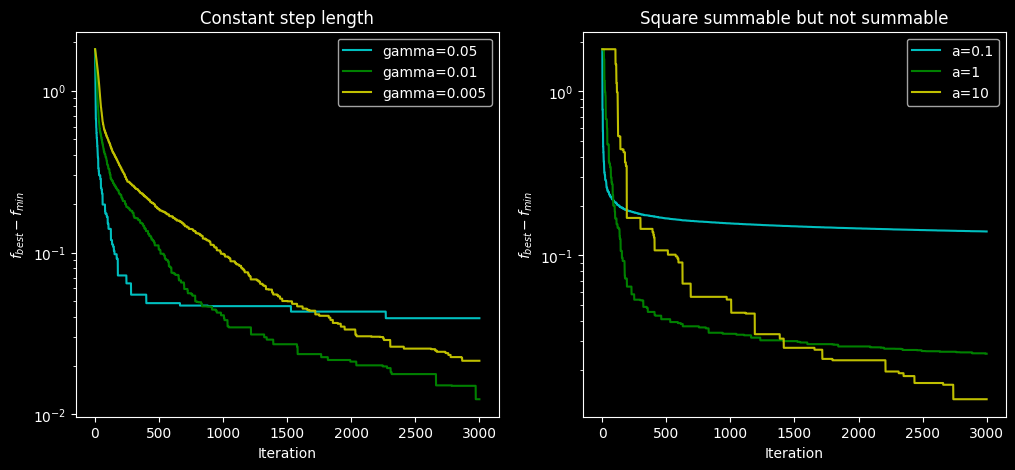

In [27]:
x1 = np.zeros(n)
Rtrue = np.linalg.norm(x1 - x_var.value)
print(f"True R: {Rtrue:.4f}")
R = 5  # Use a larger heuristic R
tol = 1e-3
n_iter = 3000
a = [0.1, 1, 10]
gammas = [0.05, 0.01, 0.005]
iters = np.arange(1, n_iter + 1)

x1_hist, hist1 = subgrad_pwl_const_step_len(A, b, x1, R, gammas[0], tol, n_iter)
x2_hist, hist2 = subgrad_pwl_const_step_len(A, b, x1, R, gammas[1], tol, n_iter)
x3_hist, hist3 = subgrad_pwl_const_step_len(A, b, x1, R, gammas[2], tol, n_iter)

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

ax[0].semilogy(iters, np.array(hist1['f_best'][1:]) - f_min, 'c-', label='gamma=0.05')
ax[0].semilogy(iters, np.array(hist2['f_best'][1:]) - f_min, 'g-', label='gamma=0.01')
ax[0].semilogy(iters, np.array(hist3['f_best'][1:]) - f_min, 'y-', label='gamma=0.005')
ax[0].set_xlabel('Iteration')
ax[0].set_ylabel('$f_{best} - f_{min}$')
ax[0].set_title('Constant step length')
ax[0].legend()

x1_hist, hist1 = subgrad_pwl_sqr_summable(A, b, x1, a[0], tol, n_iter)
x2_hist, hist2 = subgrad_pwl_sqr_summable(A, b, x1, a[1], tol, n_iter)
x3_hist, hist3 = subgrad_pwl_sqr_summable(A, b, x1, a[2], tol, n_iter)

ax[1].semilogy(iters, np.array(hist1['f_best'][1:]) - f_min, 'c-', label='a=0.1')
ax[1].semilogy(iters, np.array(hist2['f_best'][1:]) - f_min, 'g-', label='a=1')
ax[1].semilogy(iters, np.array(hist3['f_best'][1:]) - f_min, 'y-', label='a=10')
ax[1].set_xlabel('Iteration')
ax[1].set_ylabel('$f_{best} - f_{min}$')
ax[1].set_title('Square summable but not summable')
ax[1].legend()
plt.show()